## DETECTING SPAM E-MAILS USING NAIVE-BAYES

### Problem Statement

- The dataset contains one set of messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.


- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


- Our job is to classify the e-mails into spam by recognizing the keywords and the labelled data.

### Theoretical Concepts

- **Naive Bayes**<br>
    **Explanation:**
    Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. It assumes that the features used for classification are independent. Despite its "naive" assumption, it often performs well, especially in text classification.

    **Example:**
    In spam email classification, Naive Bayes can be used to determine the probability that an email is spam based on the occurrences of certain words like "free," "offer," and "discount" in the email content.
    <br>

- **Count Vectorizer**<br>
    **Explanation:**
    Count Vectorizer is a text processing technique that converts a collection of text documents to a matrix of token counts. It represents each document as a vector of word frequencies. It's commonly used in natural language processing (NLP) for feature extraction.

    **Example:**
    Using Count Vectorizer on the sentence "The cat in the hat" would result in a vector representing the count of each unique word: [1, 1, 1, 2, 1].
    <br>

- **Sentiment Analysis**<br>
    **Explanation:**
    Sentiment Analysis involves determining the sentiment expressed in a piece of text, such as positive, negative, or neutral. It's widely used in social media monitoring, customer feedback analysis, and product reviews.

    **Example:**
    Analyzing a movie review - "The plot was engaging, and the acting was superb!" would yield a positive sentiment.
    <br>
    
- **NLP**<br>
    **Explanation:**
    Natural Language Processing is a branch of artificial intelligence that focuses on the interaction between computers and human language. It encompasses tasks like text analysis, language translation, and speech recognition.

    **Example:**
    n language translation, an NLP model can be trained to convert English sentences to French, allowing for automated translation services.
    <br>

### Importing Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Dataset

In [2]:
spam_df = pd.read_csv('emails.csv')

In [3]:
spam_df.head(6)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1


In [4]:
spam_df.tail(6)

,text,spam
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


### Visualizing the Dataset

In [7]:
ham = spam_df[spam_df['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
spam = spam_df[spam_df['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [9]:
print('Spam Percentage =', (len(spam)/len(spam_df))*100, '%')

Spam Percentage = 23.88268156424581 %


In [10]:
print('Ham Percentage =', (len(ham)/len(spam_df))*100, '%')

Ham Percentage = 76.11731843575419 %


<AxesSubplot:xlabel='spam', ylabel='count'>

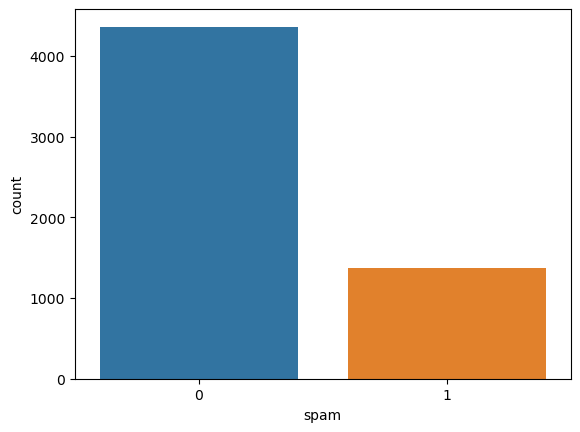

In [11]:
sns.countplot(x = spam_df['spam'])

### Data Cleaning

#### Count Vectorizer Example

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document', 'This document is the second document',\
              'And this is the third one', 'Is this the first document?']

In [13]:
sampleVectorizer = CountVectorizer()
X = sampleVectorizer.fit_transform(sample_data)

In [14]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [15]:
print(sampleVectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


Count vectorizer explanation - 
- found out the individual words (features)
- arranged those in alphabetical order
- based on this order mark the word present with number of times it occured in the statement or absent (0) in each statement.


For e.g in about output - 

Statement: This is the first document <br>
Features Present: this, is, the, first, document<br>
feature_names: \['and' **'document'** **'first'** **'is'** 'one' 'second' **'the'** 'third' **'this'**\]<br>
based on the feature name present or not its vector is 
\[ 0 **1** **1** **1** 0 0 **1** 0 **1**\]<br>

#### Applying it to our dataset

In [37]:
spamVectorizer = CountVectorizer()
spamhamVector = spamVectorizer.fit_transform(spam_df['text'])

In [38]:
print(spamVectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [39]:
print(spamhamVector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
spamhamVector.shape

(5728, 37303)

### Training the Model

In [41]:
label = spam_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [42]:
len(label)

5728

In [43]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamhamVector, label)

MultinomialNB()

#### Testing a sample

In [44]:
testing_sample = ['Free Money. Click here and win a Jackpot!!!', 'Please let me know if you need any further info']

In [45]:
testing_sample_CV = spamVectorizer.transform(testing_sample)

In [46]:
test_pred = NB_classifier.predict(testing_sample_CV)

In [47]:
test_pred

array([1, 0], dtype=int64)

#### Train & Test Original Data

In [48]:
X = spamhamVector
y = label

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25)

In [50]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

### Evaluating the Model

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
y_pred_train = NB_classifier.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

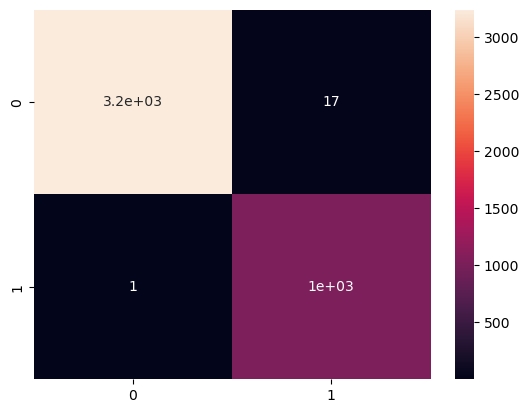

In [54]:
#Validating the training data
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot = True)

In [55]:
y_pred_test = NB_classifier.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<AxesSubplot:>

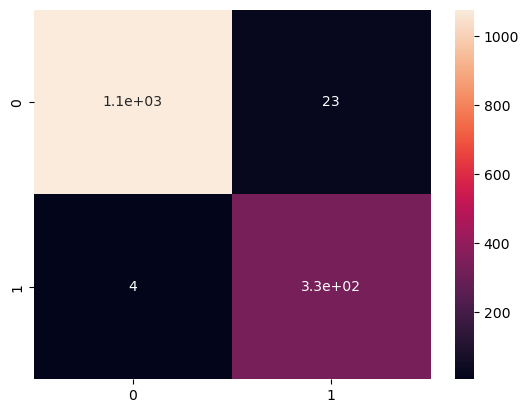

In [56]:
#Validating the testing data
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot = True)

In [57]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1100
           1       0.93      0.99      0.96       332

    accuracy                           0.98      1432
   macro avg       0.97      0.98      0.97      1432
weighted avg       0.98      0.98      0.98      1432

